In [ ]:
#Made with knowledge of DA and kaggle competitions
#used claude for debugging and making the code more efficient as the first attempt took forever to compile
#Made it much simpler than q1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Task 1 data loading and exploration

df = pd.read_csv('house_price_data.csv')
print("first 5 rows:")
print(df.head())




first 5 rows:
   property_id neighborhood  distance_to_city_center  distance_to_metro  \
0  PROP_000001  Forest Glen                      6.6                908   
1  PROP_000002     Lakeside                      2.6                 84   
2  PROP_000003     Downtown                     10.2                 50   
3  PROP_000004    Riverside                      5.1                475   
4  PROP_000005      Oakwood                      0.5                647   

   distance_to_school  crime_rate  house_age  total_area  bedrooms  bathrooms  \
0                 296         1.0         22         103         3          3   
1                  30         1.0         12         114         2          2   
2                 120         1.0         21          83         5          3   
3                  48         1.0          0         127         3          1   
4                 111         1.0         21          59         6          2   

   ...  construction_quality  renovation_status 

In [ ]:
print("\nDataset Info:")
print(df.info())

In [6]:
print("\nDataset Description:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Description:
       distance_to_city_center  distance_to_metro  distance_to_school  \
count              8000.000000        8000.000000         8000.000000   
mean                  3.785213         337.536250          148.724875   
std                   3.953137         350.469891          165.435271   
min                   0.500000          50.000000           30.000000   
25%                   1.000000          94.750000           35.000000   
50%                   2.500000         221.000000           90.000000   
75%                   5.100000         455.000000          194.000000   
max                  25.000000        3000.000000         1748.000000   

       crime_rate    house_age   total_area     bedrooms    bathrooms  \
count      8000.0  8000.000000  8000.000000  8000.000000  8000.000000   
mean          1.0    14.295125   150.608125     3.359500     2.502875   
std           0.0    14.677669    83.534599     1.129345     0.802074   
min           1.0     0.0000

Task 2 EDA


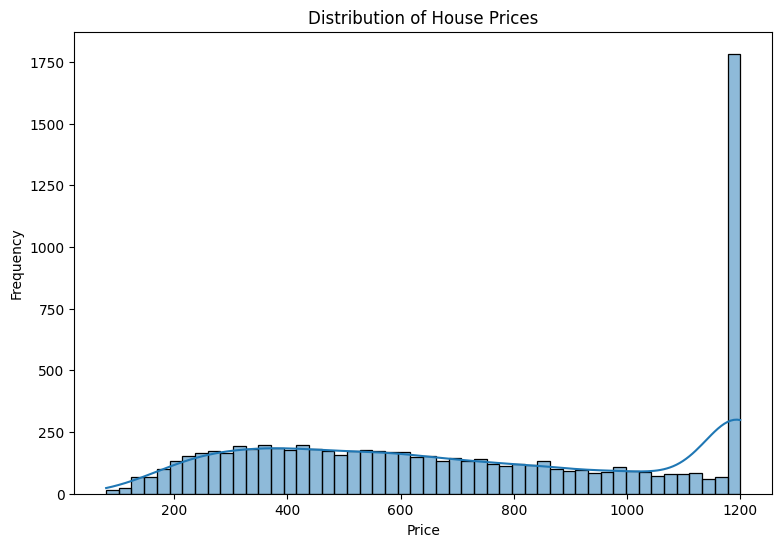

In [8]:
#EDA Task 2
#1 Analyze the price distribution (our target variable)
print("Task 2 EDA")

plt.figure(figsize=(9,6))
sns.histplot(df['sale_price'], kde=True, bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
#right skewed histogram

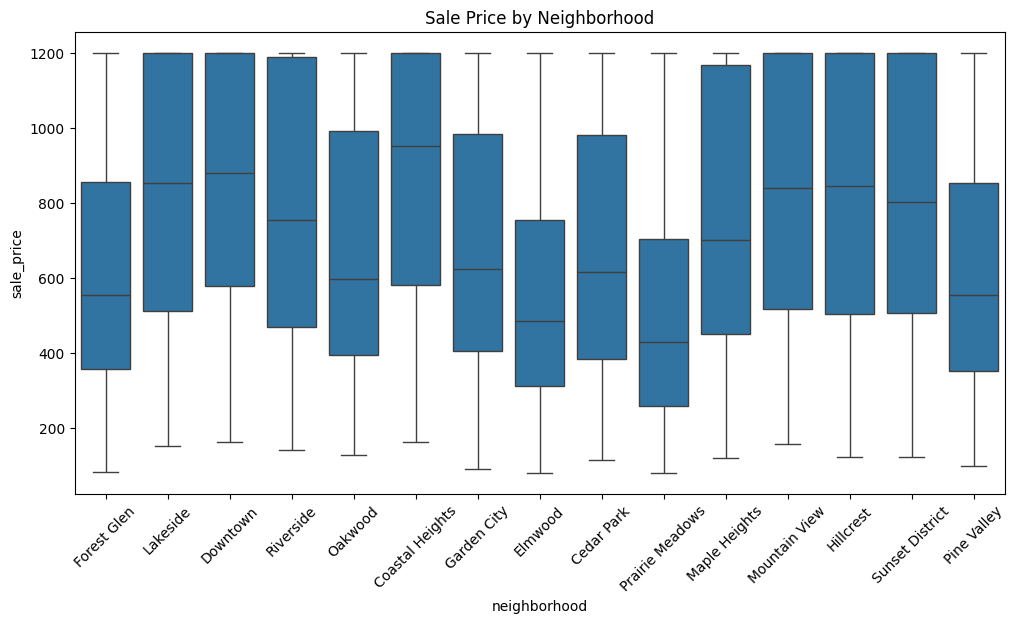

In [9]:
#2 Examine relationships between features and sale price

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='neighborhood', y='sale_price')
plt.title('Sale Price by Neighborhood')
plt.xticks(rotation=45)
plt.show()

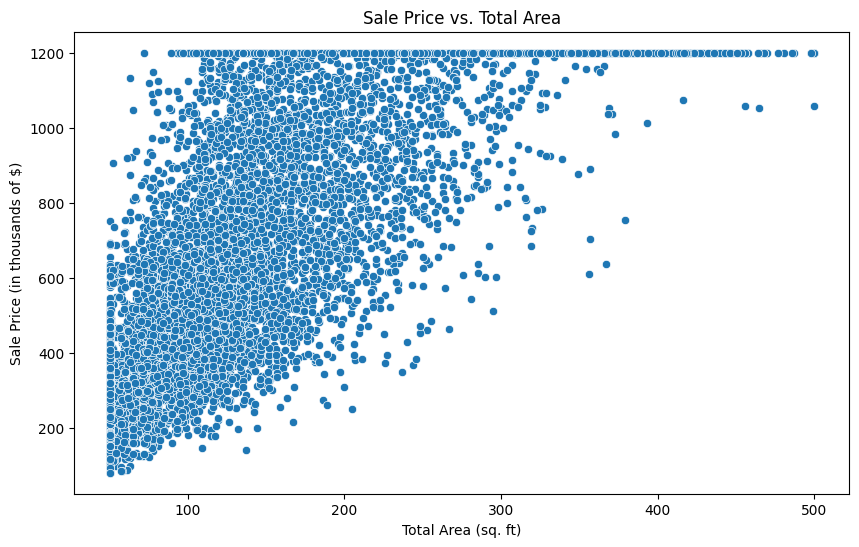

In [10]:
# Now let's see how the total area of the house relates to its price.
# We expect bigger houses to be more expensive. A scatter plot is perfect for this.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_area', y='sale_price')
plt.title('Sale Price vs. Total Area')
plt.xlabel('Total Area (sq. ft)')
plt.ylabel('Sale Price (in thousands of $)')
plt.show()

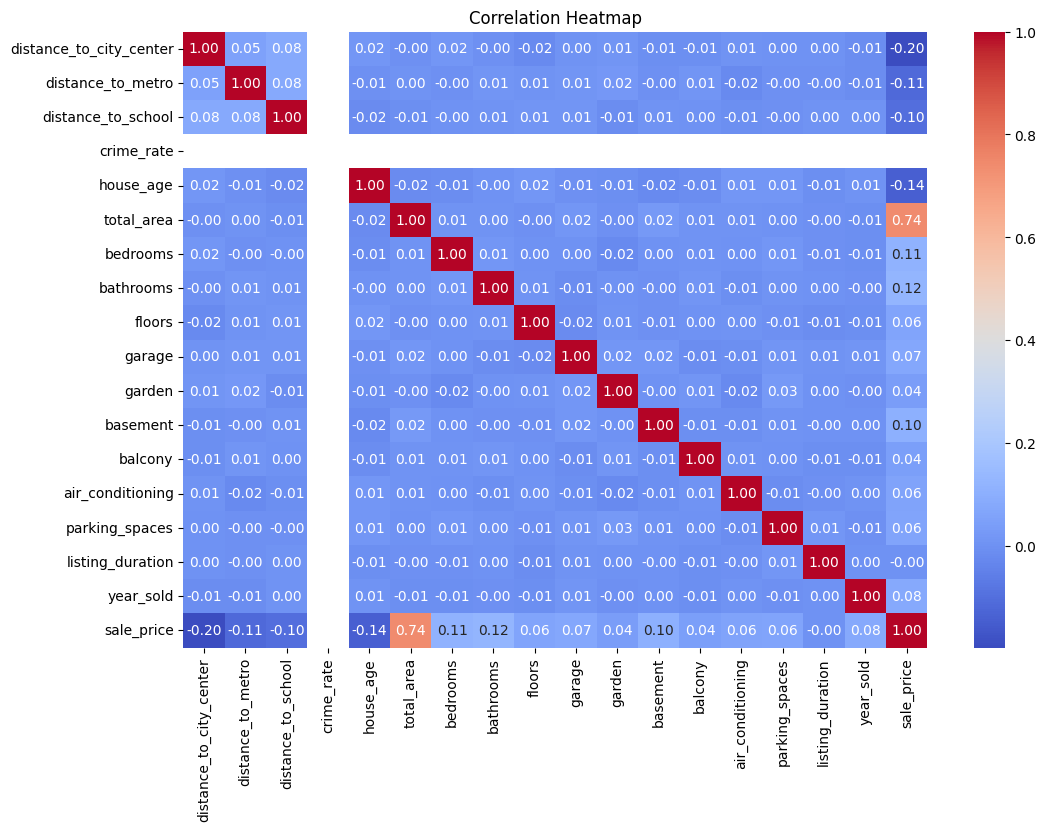

In [14]:
#3 create a correlation analysis for numerical features- finds the link among them
#using a heatmap

numerical_cols=df.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [15]:
#total area vs sale price highest correlation as expected
#distance_to_city_center,metro and school also big ones
#house age,bedrooms and bathrooms also there

#Task 3 Feature engineering
#Handling categorical variables
df_processed=pd.get_dummies(df,drop_first=True)
#dropping property id as well because its and identifier

print("Shape of the data after one-hot encoding:", df_processed.shape)
print("First 5 rows of the processed data:")
print(df_processed.head())

Shape of the data after one-hot encoding: (8000, 8046)
First 5 rows of the processed data:
   distance_to_city_center  distance_to_metro  distance_to_school  crime_rate  \
0                      6.6                908                 296         1.0   
1                      2.6                 84                  30         1.0   
2                     10.2                 50                 120         1.0   
3                      5.1                475                  48         1.0   
4                      0.5                647                 111         1.0   

   house_age  total_area  bedrooms  bathrooms  floors  garage  ...  \
0         22         103         3          3       1       1  ...   
1         12         114         2          2       2       1  ...   
2         21          83         5          3       1       1  ...   
3          0         127         3          1       2       1  ...   
4         21          59         6          2       2       0  ...   

 

In [16]:
#2 splitting data into features (X) and target (y)

X = df_processed.drop(columns=['sale_price'])
y = df_processed['sale_price']

#3 split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# random_state=42 ensures we get the same split every time we run the code.

print("\nData Splitting:")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Data Splitting:
Shape of X_train: (6400, 8045)
Shape of X_test: (1600, 8045)
Shape of y_train: (6400,)
Shape of y_test: (1600,)


In [17]:
#4 scale numerical features
# This helps the model learn more effectively. We'll use StandardScaler.
#We fit the scaler ONLY on the training data to avoid "data leakage" from the test set.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
#Task 4 Model development
print("Task 4 Model development")
model=LinearRegression()
print("Training the Linear Regression model...")
model.fit(X_train, y_train)
print("Model training complete!")

Task 4 Model development
Training the Linear Regression model...
Model training complete!


In [20]:
#Task 5 Model eval
print("Task 4 Model eval")


y_pred=model.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.4f}")

Task 4 Model eval
Mean Absolute Error (MAE): 185.61
Mean Squared Error (MSE): 45808.83
Root Mean Squared Error (RMSE): 214.03
R-squared (R2 Score): 0.6239


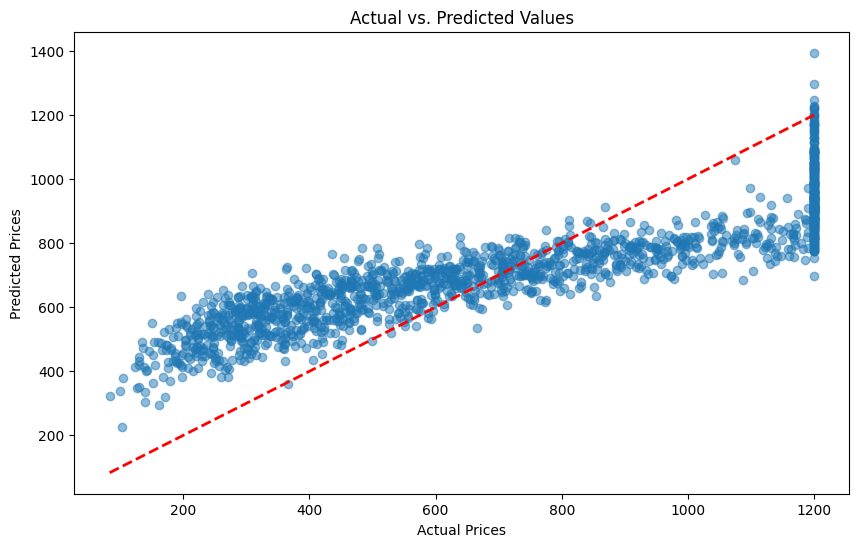

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

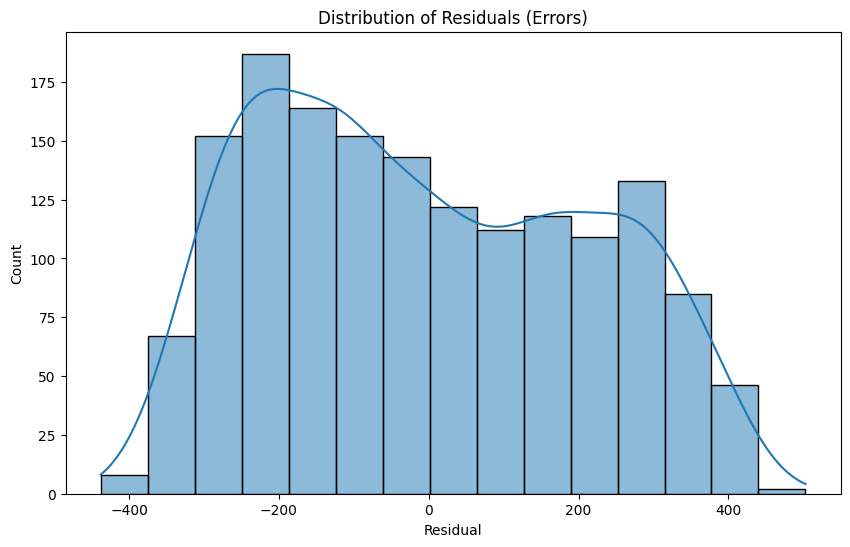

In [22]:

# Now let's plot the residuals.
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Residual')
plt.show()

In [25]:
print(f"With an R-squared value of {r2:.4f}, it can explain most of the variation in house prices.")


With an R-squared value of 0.6239, it can explain most of the variation in house prices.
